In [1]:
import pandas as pd
test_df = pd.read_csv("test_input.csv")
train_df = pd.read_csv("train.csv")

In [2]:
train_df['ADDCONTAMNT'].describe()

count    1.735890e+05
mean     7.829263e+02
std      7.909748e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.260100e+06
Name: ADDCONTAMNT, dtype: float64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
# Distribution plot
def distribution_plot(data):
    sns.distplot(data, fit=norm)
    plt.ylabel('Frequency')
    plt.title(f'{data.name} distribution')

c:\users\sinan\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinan\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\sinan\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis

NameError: name 'plt' is not defined

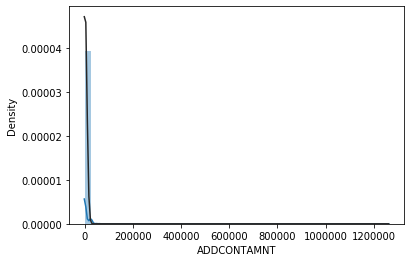

In [6]:
distribution_plot(train_df['ADDCONTAMNT'])


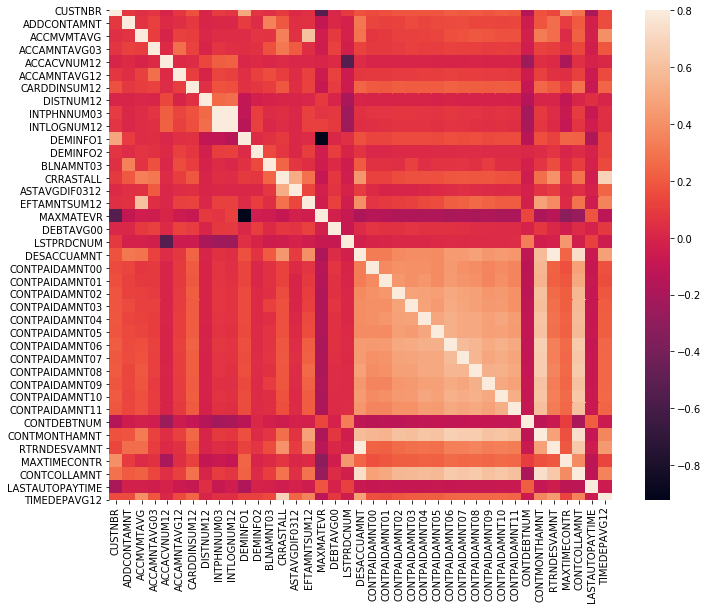

In [7]:
import matplotlib.pyplot as plt
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [8]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
BLNAMNT03,157809,0.909096
TIMEDEPAVG12,136748,0.787769
LASTAUTOPAYTIME,107240,0.617781
DEBTAVG00,89082,0.513178
EFTAMNTSUM12,87045,0.501443
CARDDINSUM12,49592,0.285686
CONTPAIDAMNT05,44634,0.257125
CONTPAIDAMNT00,44634,0.257125
CONTPAIDAMNT01,44634,0.257125
CONTPAIDAMNT02,44634,0.257125


In [9]:
for i in range(0,12): 
    if i < 10:
        train_df = train_df.drop(train_df.loc[train_df['CONTPAIDAMNT0'+str(i)].isnull()].index)
    else:
        train_df = train_df.drop(train_df.loc[train_df['CONTPAIDAMNT'+str(i)].isnull()].index)
       

In [10]:
drop_list = ['ACCAMNTAVG03', 'ACCAMNTAVG12','ACCMVMTAVG','ACCACVNUM12', 'MAXMATEVR', 'ASTAVGDIF0312', 'CRRASTALL','LSTPRDCNUM']
for i in drop_list:
    train_df = train_df.drop(train_df.loc[train_df[i].isnull()].index)

In [11]:
train_df = train_df.drop(['LASTAUTOPAYTIME', 'TIMEDEPAVG12', 'BLNAMNT03','DEBTAVG00','EFTAMNTSUM12','CARDDINSUM12'], axis=1)
train_df['CONTPAIDAMNT_AVG'] = train_df[['CONTPAIDAMNT0'+str(i) if i <10 else 'CONTPAIDAMNT'+str(i) for i in range(0,12)]].sum(axis=1).astype(int)
train_df = train_df.drop(['CONTPAIDAMNT0'+str(i) if i <10 else 'CONTPAIDAMNT'+str(i) for i in range(0,12)], axis=1)

In [12]:
train_df.count()

CUSTNBR             99397
TRAN_DATE           99397
ADDCONTAMNT         99397
ACCMVMTAVG          99397
ACCAMNTAVG03        99397
ACCACVNUM12         99397
ACCAMNTAVG12        99397
DISTNUM12           99397
INTPHNNUM03         99397
INTLOGNUM12         99397
DEMINFO1            99397
DEMINFO2            99397
CRRASTALL           99397
ASTAVGDIF0312       99397
MAXMATEVR           99397
LSTPRDCNUM          99397
DESACCUAMNT         99397
CONTDEBTNUM         99397
CONTMONTHAMNT       99397
RTRNDESVAMNT        99397
MAXTIMECONTR        99397
CONTCOLLAMNT        99397
CONTPAIDAMNT_AVG    99397
dtype: int64

In [13]:
train_df = train_df.drop(['TRAN_DATE'], axis = 1)

In [14]:
data = train_df.copy()
data.loc[data.ADDCONTAMNT > 0, 'ADDCONTAMNT'] = 1

In [15]:
from sklearn.model_selection import train_test_split
X = data.drop(['ADDCONTAMNT'],axis=1)
y = data.ADDCONTAMNT.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)


In [18]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='lbfgs', C=0.001)
lgr.fit(X_train,y_train)

LogisticRegression(C=0.001)

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_pred = lgr.predict(X_test)
print('Test:{}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Test:0.37448824907085254


In [21]:
from sklearn.model_selection import train_test_split
X1 = train_df.drop(['ADDCONTAMNT'],axis=1)
y1 = train_df.ADDCONTAMNT.values

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=2)

In [23]:
X1_train = sc.fit_transform(X1_train)
X1_test= sc.transform(X1_test)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtr = DecisionTreeRegressor(max_depth=5,min_samples_split=5,min_samples_leaf=6)
#x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)
dtr.fit(X1_train,y1_train)

y_pred_dtr = dtr.predict(X1_test)
print('Test:{}'.format(np.sqrt(mean_squared_error(y1_test,y_pred_dtr))))

Test:6032.467066981257


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
imputer.fit(test_df.iloc[:,2:])
test_df.iloc[:,2:] = imputer.transform(test_df.iloc[:,2:])

In [26]:
test_df['CONTPAIDAMNT_AVG'] = test_df[['CONTPAIDAMNT00','CONTPAIDAMNT01','CONTPAIDAMNT02','CONTPAIDAMNT03','CONTPAIDAMNT04','CONTPAIDAMNT05','CONTPAIDAMNT06','CONTPAIDAMNT08','CONTPAIDAMNT09','CONTPAIDAMNT10','CONTPAIDAMNT11']].sum(axis=1).astype(int)
test_df = test_df.drop(['CONTPAIDAMNT00','CONTPAIDAMNT01','CONTPAIDAMNT02','CONTPAIDAMNT03','CONTPAIDAMNT04','CONTPAIDAMNT05','CONTPAIDAMNT06','CONTPAIDAMNT08','CONTPAIDAMNT09','CONTPAIDAMNT10','CONTPAIDAMNT11'],axis=1)
test_df = test_df.drop(['TRAN_DATE'], axis=1)

In [27]:
test_df.shape


(16978, 27)

In [28]:
X_train.shape


(79517, 21)

In [29]:
test_df = test_df.drop(['CARDDINSUM12','BLNAMNT03','DEBTAVG00','EFTAMNTSUM12', 'LASTAUTOPAYTIME', 'TIMEDEPAVG12'],axis=1)


In [30]:
test_df.shape


(16978, 21)

In [31]:
X_train.shape


(79517, 21)

In [32]:
X_testDF_scaled= sc.transform(test_df)


In [33]:
samplesub = pd.DataFrame()
samplesub['Id'] = test_df['CUSTNBR']
samplesub['Predicted'] = pd.Series(dtr.predict(X_testDF_scaled))

In [34]:
samplesub['ypred'] = pd.Series(lgr.predict(X_testDF_scaled))


In [35]:
samplesub.loc[samplesub.ypred == 0, 'Predicted'] = 0


In [36]:
samplesub = samplesub.drop(['ypred'],axis=1)


In [ ]:
samplesub.to_csv('submission.csv',index=False)
